In [1]:
import zipfile
import os

import matplotlib.pyplot as plt
import cv2

### Extract image data from zipfile

In [2]:
# Unzip and Organize Data
def unzip_data(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

zip_path = '../archive (7).zip'
extract_to = '../data/raw'
unzip_data(zip_path, extract_to)

### Visualize sample image from the training set

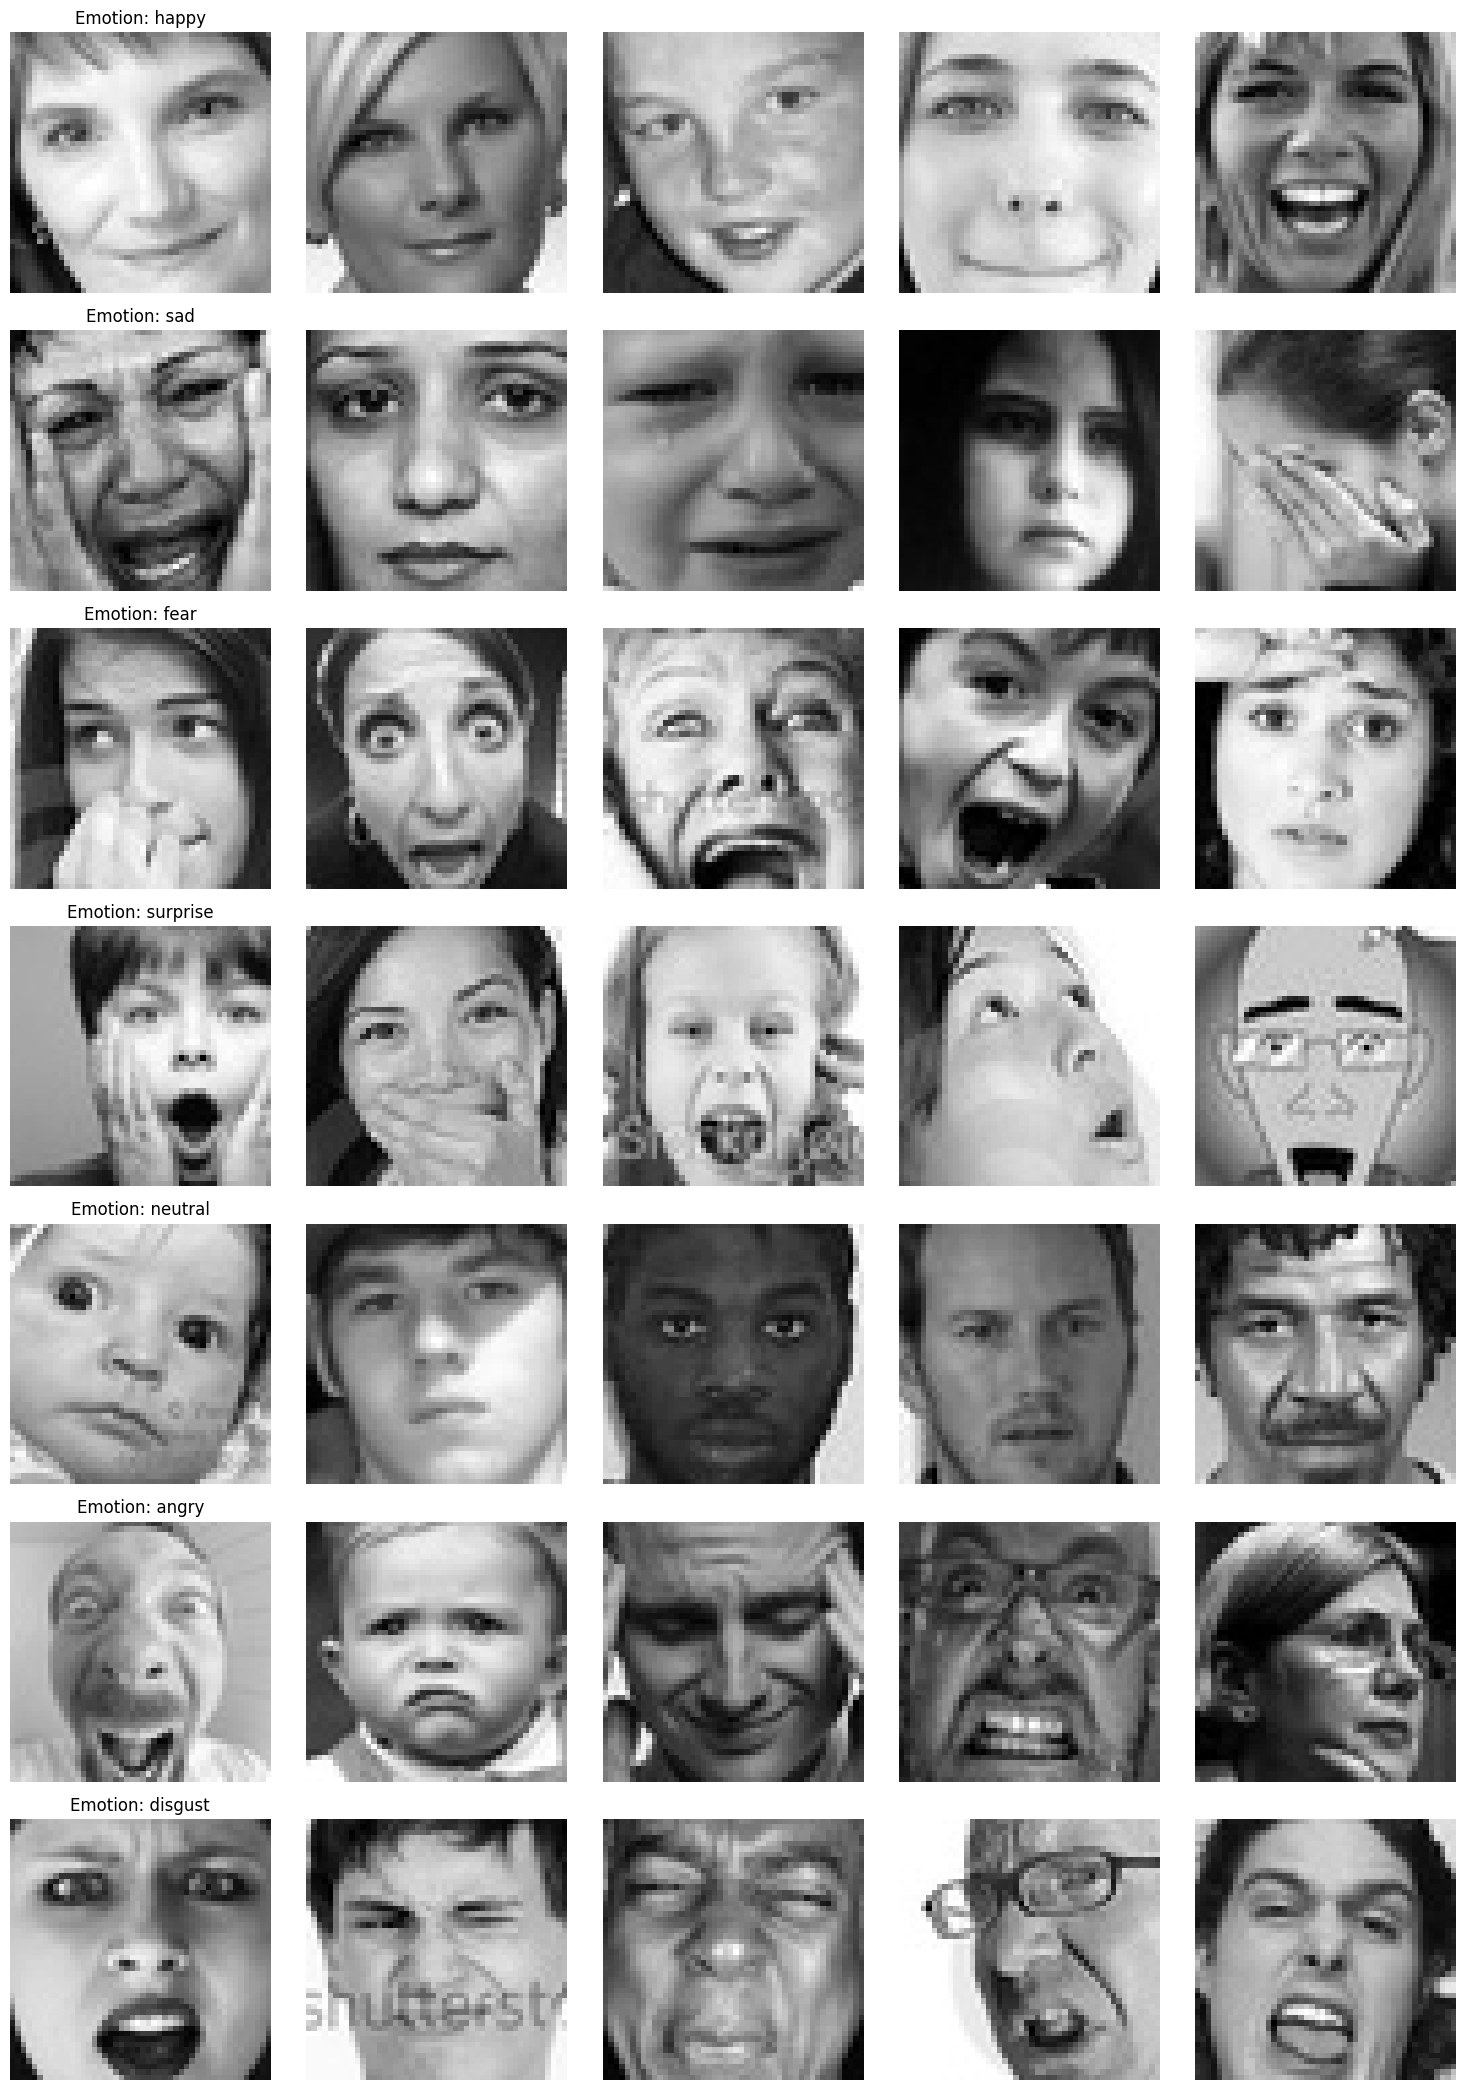

In [5]:
# Load and visualize sample images from the dataset
def load_sample_images(data_dir, num_samples=5):
    sample_images = []
    labels = []
    for label_folder in os.listdir(data_dir):
        for img_file in os.listdir(os.path.join(data_dir, label_folder))[:num_samples]:  # Load num_samples samples per class
            image_path = os.path.join(data_dir, label_folder, img_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            sample_images.append(image)
            labels.append(label_folder)
    return sample_images, labels

# Load sample images
num_samples_per_class = 5
sample_images, labels = load_sample_images('../data/raw/train/', num_samples=num_samples_per_class)

# Determine number of rows and columns for subplots
num_classes = len(set(labels))
fig, axes = plt.subplots(num_classes, num_samples_per_class, figsize=(15, num_classes*3))

for i, (img, label) in enumerate(zip(sample_images, labels)):
    row = i // num_samples_per_class
    col = i % num_samples_per_class
    axes[row, col].imshow(img, cmap='gray')
    axes[row, col].axis('off')
    if col == 0:
        axes[row, col].set_title(f'Emotion: {label}')

plt.tight_layout()
#plt.savefig('../plots/sample_images.png', bbox_inches='tight')
plt.show()

**Conclusion**

In this phase the training dataset were explored.